# Fase 2: EDA - Análisis Exploratorio de Datos

**Proyecto:** Análisis de Deserción Educativa en Colombia

**Objetivos de este notebook:**
1. Cargar los datos procesados del ETL
2. Realizar análisis univariado de variables clave
3. Analizar relaciones bivariadas (deserción vs otras variables)
4. Explorar correlaciones y patrones multivariados
5. Detectar outliers y anomalías
6. Generar insights accionables para el modelo predictivo
7. Crear visualizaciones profesionales

---

## 1. Importación de Librerías

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Análisis estadístico
from scipy import stats
from scipy.stats import chi2_contingency

# Utilidades
import warnings
import os

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Crear directorio para figuras si no existe
os.makedirs('../reports/figures', exist_ok=True)

print("✓ Librerías importadas exitosamente")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de NumPy: {np.__version__}")

✓ Librerías importadas exitosamente
Versión de Pandas: 2.3.3
Versión de NumPy: 2.3.4


## 2. Carga de Datos Procesados

In [2]:
# Cargar datos limpios del ETL
df_no_academica = pd.read_csv('../data/processed/desercion_no_academica_clean.csv')
df_academica = pd.read_csv('../data/processed/desercion_academica_clean.csv')
df_sena = pd.read_csv('../data/processed/desercion_sena_clean.csv')

print("=" * 70)
print("DATOS CARGADOS EXITOSAMENTE")
print("=" * 70)
print(f"Dataset 1 - No Académica UPTC: {len(df_no_academica):,} registros")
print(f"Dataset 2 - Académica UPTC: {len(df_academica):,} registros")
print(f"Dataset 3 - SENA: {len(df_sena):,} registros")
print(f"\nTOTAL DE REGISTROS: {len(df_no_academica) + len(df_academica) + len(df_sena):,}")
print("=" * 70)

DATOS CARGADOS EXITOSAMENTE
Dataset 1 - No Académica UPTC: 1,595 registros
Dataset 2 - Académica UPTC: 3,372 registros
Dataset 3 - SENA: 42,080 registros

TOTAL DE REGISTROS: 47,047


## 3. Análisis Univariado

### 3.1 Dataset UPTC - Deserción Académica (Análisis Principal)

In [3]:
# Enfocarnos en el dataset con más información individual
df = df_academica.copy()

print("Análisis Principal: Dataset Deserción Académica UPTC")
print(f"Registros: {len(df):,}")
print(f"Variables: {df.shape[1]}")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())

Análisis Principal: Dataset Deserción Académica UPTC
Registros: 3,372
Variables: 22

Columnas disponibles:
['periodo', 'nombre_facultad', 'nombre_programa', 'jornada', 'modalidad', 'nombre_sede', 'tipo_iden_est', 'fecha_nacimiento', 'genero', 'estrato', 'nombre_estado', 'origen_geografico', 'lugar_expedicion', 'edad', 'grupo_edad', 'periodo_año', 'periodo_semestre', 'estrato_num', 'grupo_estrato', 'institucion', 'tipo_desercion', 'es_desertor']


### 3.2 Variables Demográficas

ANÁLISIS DE EDAD
count   3372.00
mean      25.19
std        6.20
min       16.00
25%       21.00
50%       24.00
75%       28.00
max       75.00
Name: edad, dtype: float64

Rango: 16 - 75 años
Moda: 22 años


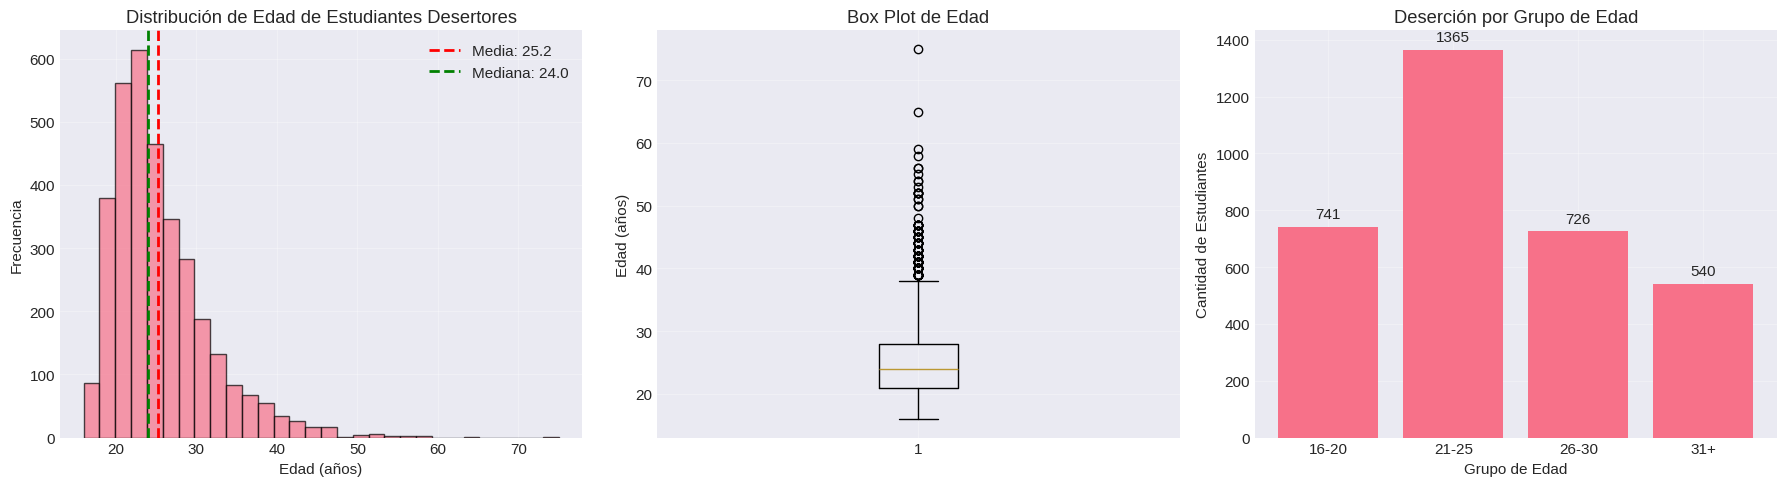


✓ Gráfico guardado: reports/figures/eda_edad_analisis.png


In [4]:
# Análisis de EDAD
print("=" * 70)
print("ANÁLISIS DE EDAD")
print("=" * 70)
print(df['edad'].describe())
print(f"\nRango: {df['edad'].min()} - {df['edad'].max()} años")
print(f"Moda: {df['edad'].mode()[0]} años")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df['edad'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(df['edad'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["edad"].mean():.1f}')
axes[0].axvline(df['edad'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["edad"].median():.1f}')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Edad de Estudiantes Desertores')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['edad'].dropna(), vert=True)
axes[1].set_ylabel('Edad (años)')
axes[1].set_title('Box Plot de Edad')
axes[1].grid(alpha=0.3)

# Distribución por grupo de edad
if 'grupo_edad' in df.columns:
    grupo_edad_counts = df['grupo_edad'].value_counts().sort_index()
    axes[2].bar(range(len(grupo_edad_counts)), grupo_edad_counts.values)
    axes[2].set_xticks(range(len(grupo_edad_counts)))
    axes[2].set_xticklabels(grupo_edad_counts.index, rotation=0)
    axes[2].set_xlabel('Grupo de Edad')
    axes[2].set_ylabel('Cantidad de Estudiantes')
    axes[2].set_title('Deserción por Grupo de Edad')
    axes[2].grid(alpha=0.3)
    
    # Añadir valores sobre las barras
    for i, v in enumerate(grupo_edad_counts.values):
        axes[2].text(i, v + 20, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../reports/figures/eda_edad_analisis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_edad_analisis.png")

ANÁLISIS DE GÉNERO
Género  Cantidad  Porcentaje
     M      2052       60.85
     F      1320       39.15


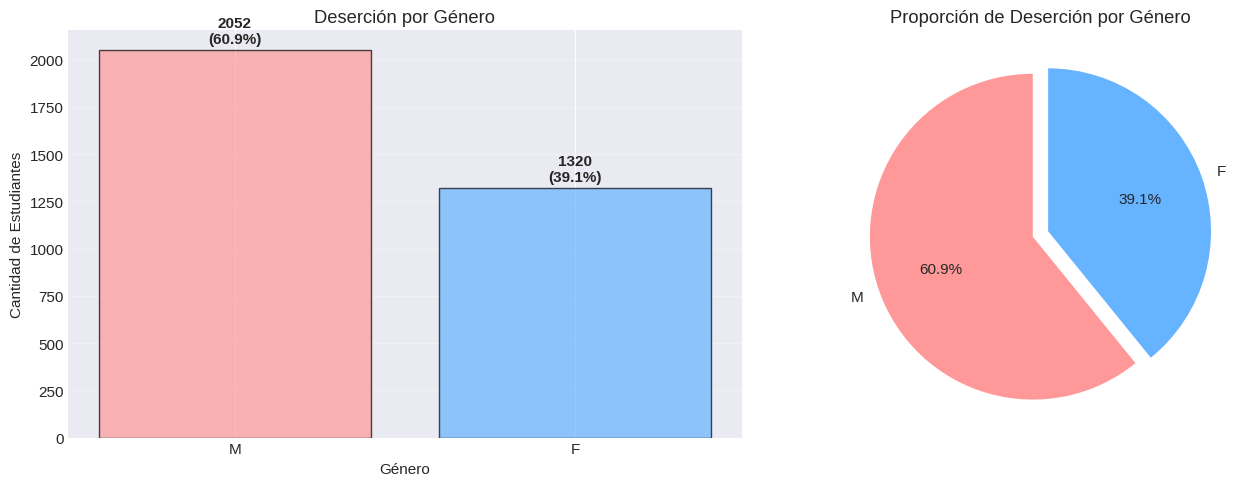


✓ Gráfico guardado: reports/figures/eda_genero_analisis.png


In [5]:
# Análisis de GÉNERO
print("=" * 70)
print("ANÁLISIS DE GÉNERO")
print("=" * 70)
genero_counts = df['genero'].value_counts()
genero_pct = df['genero'].value_counts(normalize=True) * 100

genero_df = pd.DataFrame({
    'Género': genero_counts.index,
    'Cantidad': genero_counts.values,
    'Porcentaje': genero_pct.values
})
print(genero_df.to_string(index=False))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors = ['#ff9999', '#66b3ff']
axes[0].bar(genero_counts.index, genero_counts.values, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Cantidad de Estudiantes')
axes[0].set_title('Deserción por Género')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores
for i, (idx, val) in enumerate(genero_counts.items()):
    axes[0].text(i, val + 20, f'{val}\n({genero_pct[idx]:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
axes[1].pie(genero_counts.values, labels=genero_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.05, 0.05])
axes[1].set_title('Proporción de Deserción por Género')

plt.tight_layout()
plt.savefig('../reports/figures/eda_genero_analisis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_genero_analisis.png")

ANÁLISIS DE ESTRATO SOCIOECONÓMICO

Valores únicos de estrato:
estrato
2                  1840
1                   797
3                   378
SIN INFORMACIÓN     221
SIN INFORMACION      52
4                    19
Name: count, dtype: int64

Distribución por Grupo de Estrato:
grupo_estrato
BAJO     2637
MEDIO     397
Name: count, dtype: int64


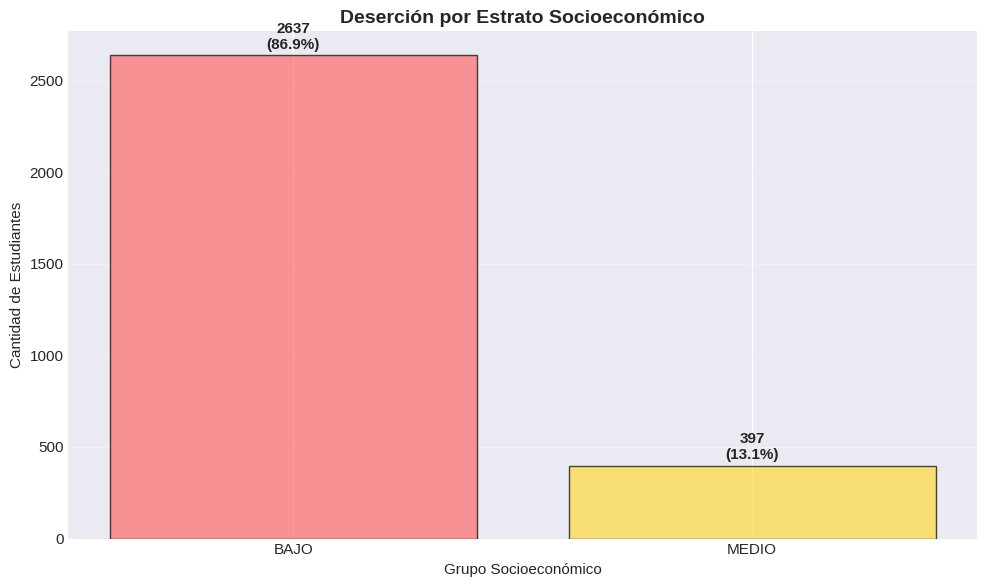


✓ Gráfico guardado: reports/figures/eda_estrato_analisis.png

💡 INSIGHT: El estrato BAJO tiene la mayor deserción (86.9%)


In [6]:
# Análisis de ESTRATO SOCIOECONÓMICO
print("=" * 70)
print("ANÁLISIS DE ESTRATO SOCIOECONÓMICO")
print("=" * 70)

# Analizar columna de estrato
print("\nValores únicos de estrato:")
print(df['estrato'].value_counts().head(10))

# Si existe grupo_estrato
if 'grupo_estrato' in df.columns:
    grupo_estrato_counts = df['grupo_estrato'].value_counts().sort_index()
    print("\nDistribución por Grupo de Estrato:")
    print(grupo_estrato_counts)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(10, 6))
    colors_estrato = ['#ff6b6b', '#ffd93d', '#6bcf7f']
    bars = ax.bar(range(len(grupo_estrato_counts)), grupo_estrato_counts.values, 
                   color=colors_estrato, edgecolor='black', alpha=0.7)
    ax.set_xticks(range(len(grupo_estrato_counts)))
    ax.set_xticklabels(grupo_estrato_counts.index, rotation=0)
    ax.set_xlabel('Grupo Socioeconómico')
    ax.set_ylabel('Cantidad de Estudiantes')
    ax.set_title('Deserción por Estrato Socioeconómico', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir valores y porcentajes
    total = grupo_estrato_counts.sum()
    for i, (bar, val) in enumerate(zip(bars, grupo_estrato_counts.values)):
        pct = (val / total) * 100
        ax.text(bar.get_x() + bar.get_width()/2, val + 20, 
                f'{val}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/eda_estrato_analisis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Gráfico guardado: reports/figures/eda_estrato_analisis.png")
    
    # Insight
    if len(grupo_estrato_counts) > 0:
        estrato_mas_afectado = grupo_estrato_counts.idxmax()
        pct_mas_afectado = (grupo_estrato_counts.max() / total) * 100
        print(f"\n💡 INSIGHT: El estrato {estrato_mas_afectado} tiene la mayor deserción ({pct_mas_afectado:.1f}%)")

### 3.3 Variables Académicas

ANÁLISIS POR FACULTAD

Top 10 Facultades con Mayor Deserción:
nombre_facultad
ESTUDIOS A DISTANCIA                     1184
CIENCIAS DE LA EDUCACION                  571
INGENIERIA                                402
SECCIONAL DUITAMA                         293
SECCIONAL SOGAMOSO                        285
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS     205
CIENCIAS                                  181
CIENCIAS AGROPECUARIAS                     87
SECCIONAL CHIQUINQUIRA                     81
DERECHO Y CIENCIAS  SOCIALES               46
Name: count, dtype: int64


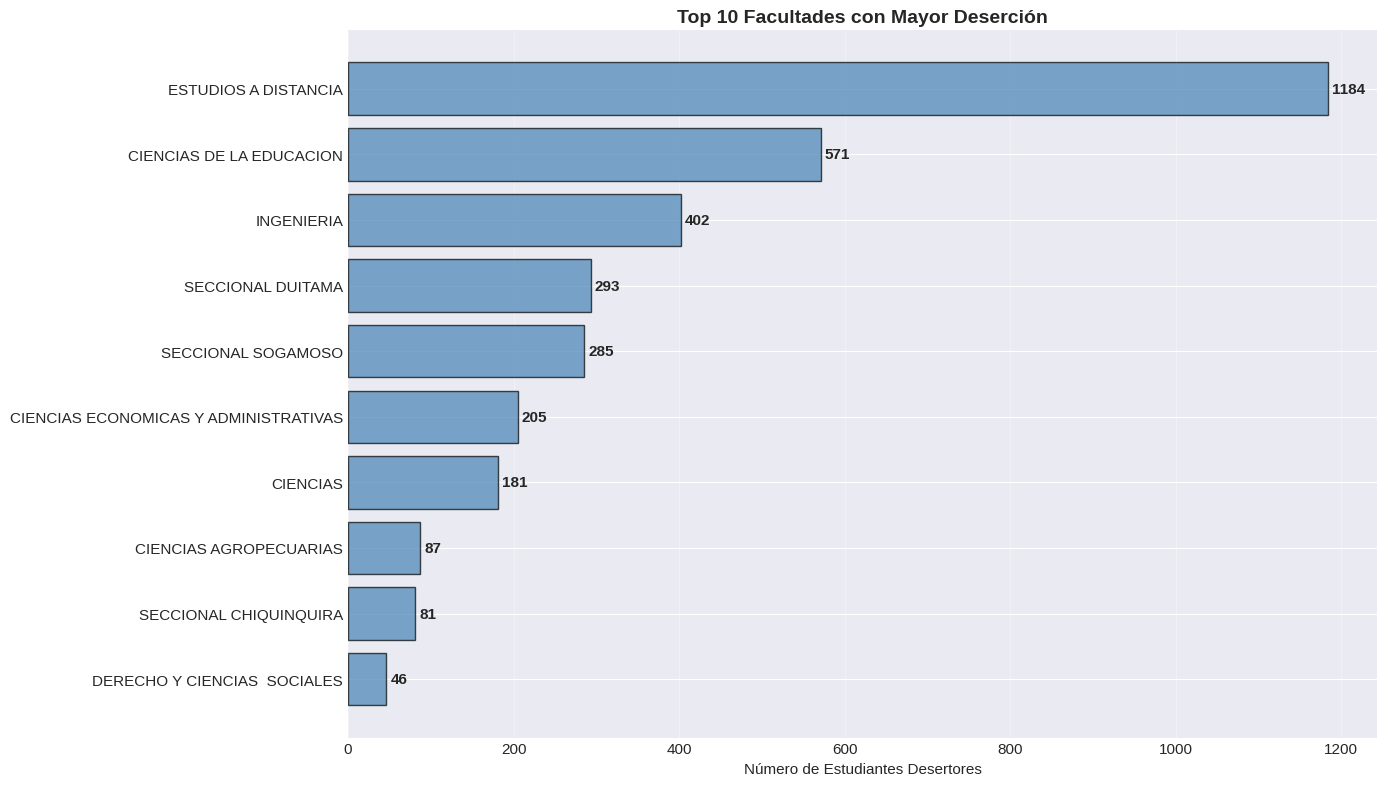


✓ Gráfico guardado: reports/figures/eda_facultad_top10.png


In [7]:
# Análisis de FACULTAD
print("=" * 70)
print("ANÁLISIS POR FACULTAD")
print("=" * 70)

facultad_counts = df['nombre_facultad'].value_counts().head(10)
print("\nTop 10 Facultades con Mayor Deserción:")
print(facultad_counts)

# Visualización
fig, ax = plt.subplots(figsize=(14, 8))
y_pos = np.arange(len(facultad_counts))
bars = ax.barh(y_pos, facultad_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels([label[:40] + '...' if len(label) > 40 else label for label in facultad_counts.index])
ax.invert_yaxis()
ax.set_xlabel('Número de Estudiantes Desertores')
ax.set_title('Top 10 Facultades con Mayor Deserción', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for i, (bar, val) in enumerate(zip(bars, facultad_counts.values)):
    ax.text(val + 5, bar.get_y() + bar.get_height()/2, str(val), 
            va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/eda_facultad_top10.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_facultad_top10.png")

ANÁLISIS POR MODALIDAD
 Modalidad  Cantidad  Porcentaje
PRESENCIAL      2073       61.48
   VIRTUAL       762       22.60
 DISTANCIA       537       15.93


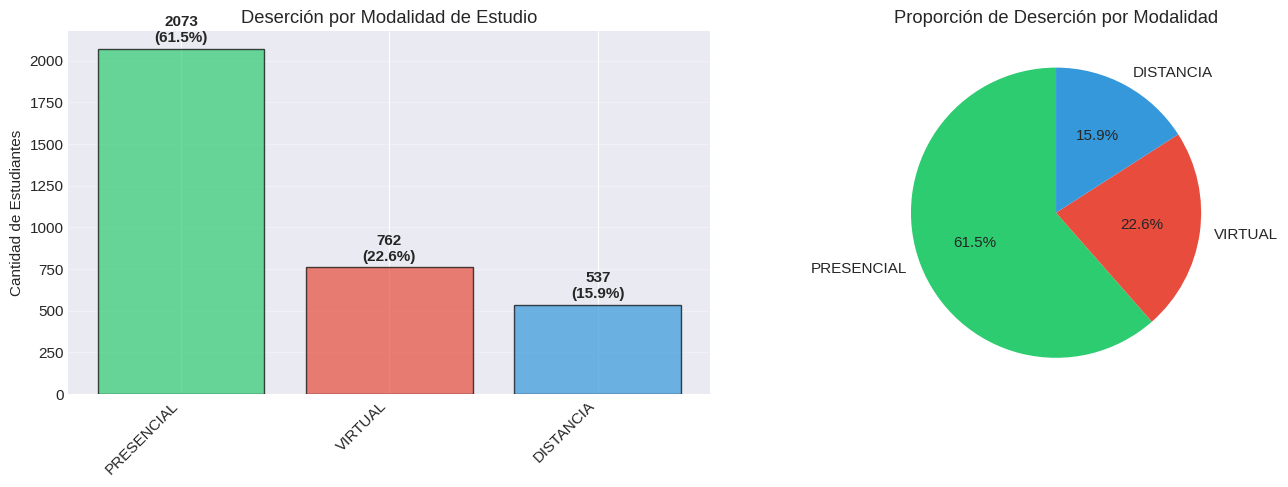


✓ Gráfico guardado: reports/figures/eda_modalidad_analisis.png


In [8]:
# Análisis de MODALIDAD
print("=" * 70)
print("ANÁLISIS POR MODALIDAD")
print("=" * 70)

modalidad_counts = df['modalidad'].value_counts()
modalidad_pct = df['modalidad'].value_counts(normalize=True) * 100

modalidad_df = pd.DataFrame({
    'Modalidad': modalidad_counts.index,
    'Cantidad': modalidad_counts.values,
    'Porcentaje': modalidad_pct.values
})
print(modalidad_df.to_string(index=False))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors_mod = ['#2ecc71', '#e74c3c', '#3498db']
axes[0].bar(range(len(modalidad_counts)), modalidad_counts.values, 
            color=colors_mod[:len(modalidad_counts)], edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(modalidad_counts)))
axes[0].set_xticklabels(modalidad_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Cantidad de Estudiantes')
axes[0].set_title('Deserción por Modalidad de Estudio')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores
for i, val in enumerate(modalidad_counts.values):
    axes[0].text(i, val + 20, f'{val}\n({modalidad_pct.values[i]:.1f}%)', 
                 ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
axes[1].pie(modalidad_counts.values, labels=modalidad_counts.index, autopct='%1.1f%%',
            colors=colors_mod[:len(modalidad_counts)], startangle=90)
axes[1].set_title('Proporción de Deserción por Modalidad')

plt.tight_layout()
plt.savefig('../reports/figures/eda_modalidad_analisis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_modalidad_analisis.png")

ANÁLISIS POR JORNADA
jornada
DIURNA              1471
OTRA                1294
EXTENDIDA            349
NOCTURNA             213
DIURNA - NOCTURA      45
Name: count, dtype: int64


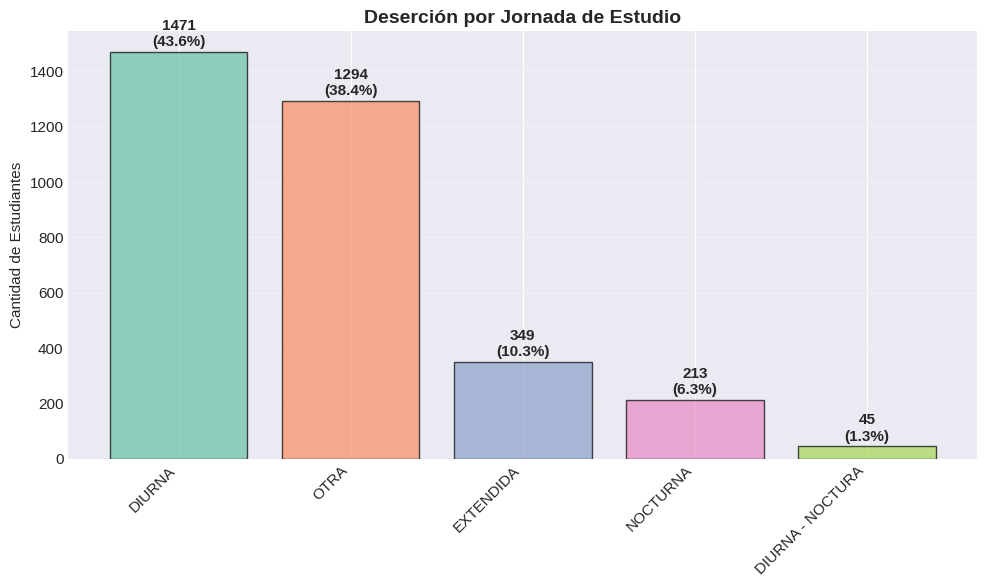


✓ Gráfico guardado: reports/figures/eda_jornada_analisis.png


In [9]:
# Análisis de JORNADA
print("=" * 70)
print("ANÁLISIS POR JORNADA")
print("=" * 70)

jornada_counts = df['jornada'].value_counts()
print(jornada_counts)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
colors_jor = sns.color_palette('Set2', len(jornada_counts))
bars = ax.bar(range(len(jornada_counts)), jornada_counts.values, 
              color=colors_jor, edgecolor='black', alpha=0.7)
ax.set_xticks(range(len(jornada_counts)))
ax.set_xticklabels(jornada_counts.index, rotation=45, ha='right')
ax.set_ylabel('Cantidad de Estudiantes')
ax.set_title('Deserción por Jornada de Estudio', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Añadir valores
total_jornada = jornada_counts.sum()
for i, val in enumerate(jornada_counts.values):
    pct = (val / total_jornada) * 100
    ax.text(i, val + 10, f'{val}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/eda_jornada_analisis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_jornada_analisis.png")

### 3.4 Análisis Temporal

ANÁLISIS TEMPORAL DE DESERCIÓN

Deserción por Año:
periodo_año
2020.00     45
2021.00    664
2022.00    749
2023.00    672
2024.00    837
2025.00    405
dtype: int64


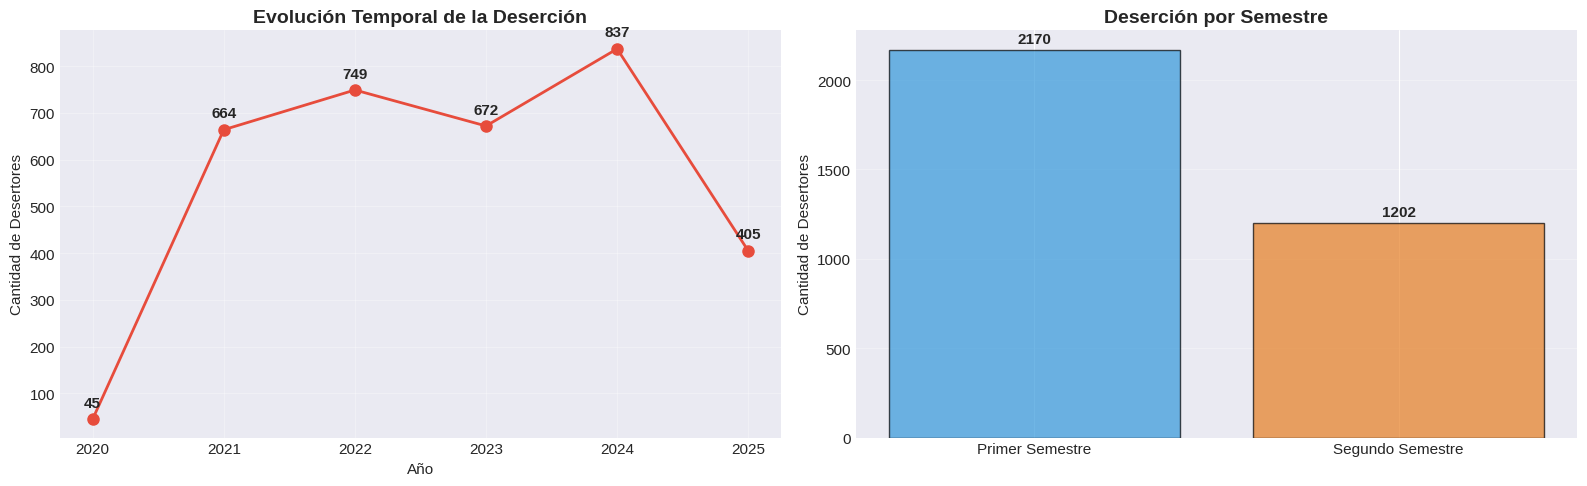


✓ Gráfico guardado: reports/figures/eda_tendencia_temporal.png

💡 INSIGHT: Año con mayor deserción: 2024 (837 estudiantes)
💡 INSIGHT: Año con menor deserción: 2020 (45 estudiantes)


In [10]:
# Análisis de TENDENCIA TEMPORAL
print("=" * 70)
print("ANÁLISIS TEMPORAL DE DESERCIÓN")
print("=" * 70)

# Deserción por año
if 'periodo_año' in df.columns:
    desercion_por_año = df.groupby('periodo_año').size().sort_index()
    print("\nDeserción por Año:")
    print(desercion_por_año)
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Gráfico de líneas
    axes[0].plot(desercion_por_año.index, desercion_por_año.values, 
                 marker='o', linewidth=2, markersize=8, color='#e74c3c')
    axes[0].set_xlabel('Año')
    axes[0].set_ylabel('Cantidad de Desertores')
    axes[0].set_title('Evolución Temporal de la Deserción', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Añadir valores
    for x, y in zip(desercion_por_año.index, desercion_por_año.values):
        axes[0].text(x, y + 20, str(int(y)), ha='center', va='bottom', fontweight='bold')
    
    # Deserción por semestre
    if 'periodo_semestre' in df.columns:
        desercion_por_semestre = df.groupby('periodo_semestre').size()
        labels = ['Primer Semestre', 'Segundo Semestre']
        axes[1].bar(range(len(desercion_por_semestre)), desercion_por_semestre.values,
                    color=['#3498db', '#e67e22'], edgecolor='black', alpha=0.7)
        axes[1].set_xticks(range(len(desercion_por_semestre)))
        axes[1].set_xticklabels([labels[int(i)-1] for i in desercion_por_semestre.index])
        axes[1].set_ylabel('Cantidad de Desertores')
        axes[1].set_title('Deserción por Semestre', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Añadir valores
        for i, val in enumerate(desercion_por_semestre.values):
            axes[1].text(i, val + 20, str(int(val)), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/eda_tendencia_temporal.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Gráfico guardado: reports/figures/eda_tendencia_temporal.png")
    
    # Insight
    if len(desercion_por_año) > 1:
        año_mayor = desercion_por_año.idxmax()
        año_menor = desercion_por_año.idxmin()
        print(f"\n💡 INSIGHT: Año con mayor deserción: {int(año_mayor)} ({desercion_por_año.max()} estudiantes)")
        print(f"💡 INSIGHT: Año con menor deserción: {int(año_menor)} ({desercion_por_año.min()} estudiantes)")

## 4. Análisis Bivariado

### 4.1 Relación entre Variables Demográficas y Académicas

ANÁLISIS: EDAD vs MODALIDAD

Estadísticas de Edad por Modalidad:
            mean  median  std  count
modalidad                           
DISTANCIA  26.17   25.00 6.47    537
PRESENCIAL 24.19   23.00 5.84   2073
VIRTUAL    27.21   26.00 6.36    762


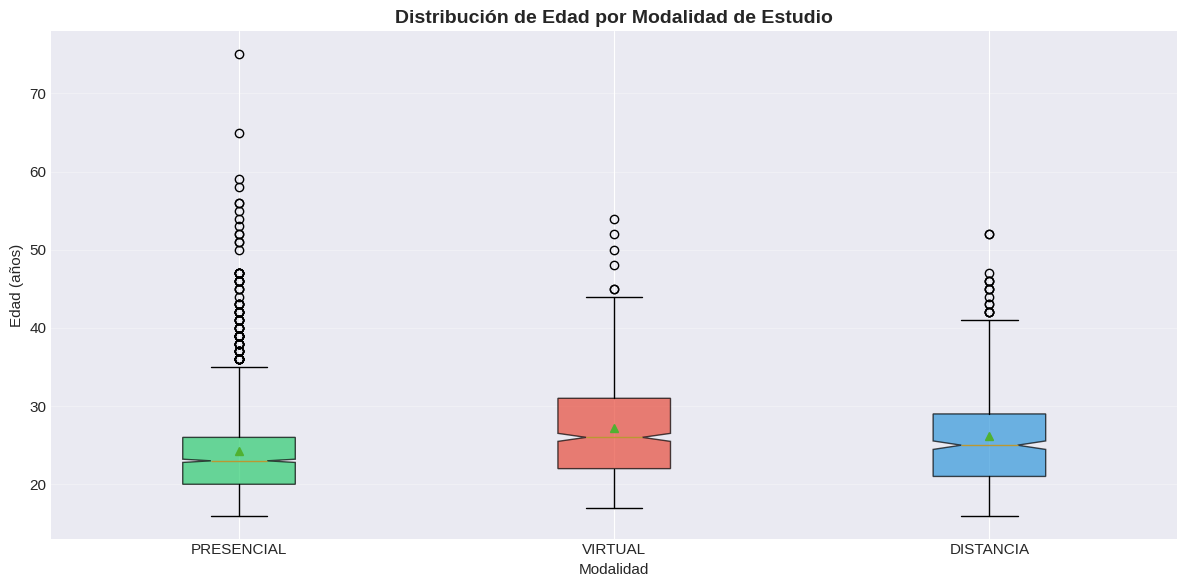


✓ Gráfico guardado: reports/figures/eda_edad_vs_modalidad.png


In [11]:
# Edad vs Modalidad
print("=" * 70)
print("ANÁLISIS: EDAD vs MODALIDAD")
print("=" * 70)

# Calcular estadísticas
edad_por_modalidad = df.groupby('modalidad')['edad'].agg(['mean', 'median', 'std', 'count'])
print("\nEstadísticas de Edad por Modalidad:")
print(edad_por_modalidad)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
modalidades = df['modalidad'].unique()
data_to_plot = [df[df['modalidad'] == mod]['edad'].dropna() for mod in modalidades]

bp = ax.boxplot(data_to_plot, labels=modalidades, patch_artist=True, 
                notch=True, showmeans=True)

# Colorear cajas
colors = ['#2ecc71', '#e74c3c', '#3498db']
for patch, color in zip(bp['boxes'], colors[:len(modalidades)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Modalidad')
ax.set_ylabel('Edad (años)')
ax.set_title('Distribución de Edad por Modalidad de Estudio', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda_edad_vs_modalidad.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_edad_vs_modalidad.png")

ANÁLISIS: GÉNERO vs FACULTAD

Deserción por Género en Top 5 Facultades:
genero                      F    M
nombre_facultad                   
CIENCIAS DE LA EDUCACION  250  321
ESTUDIOS A DISTANCIA      650  534
INGENIERIA                 78  324
SECCIONAL DUITAMA          68  225
SECCIONAL SOGAMOSO         64  221


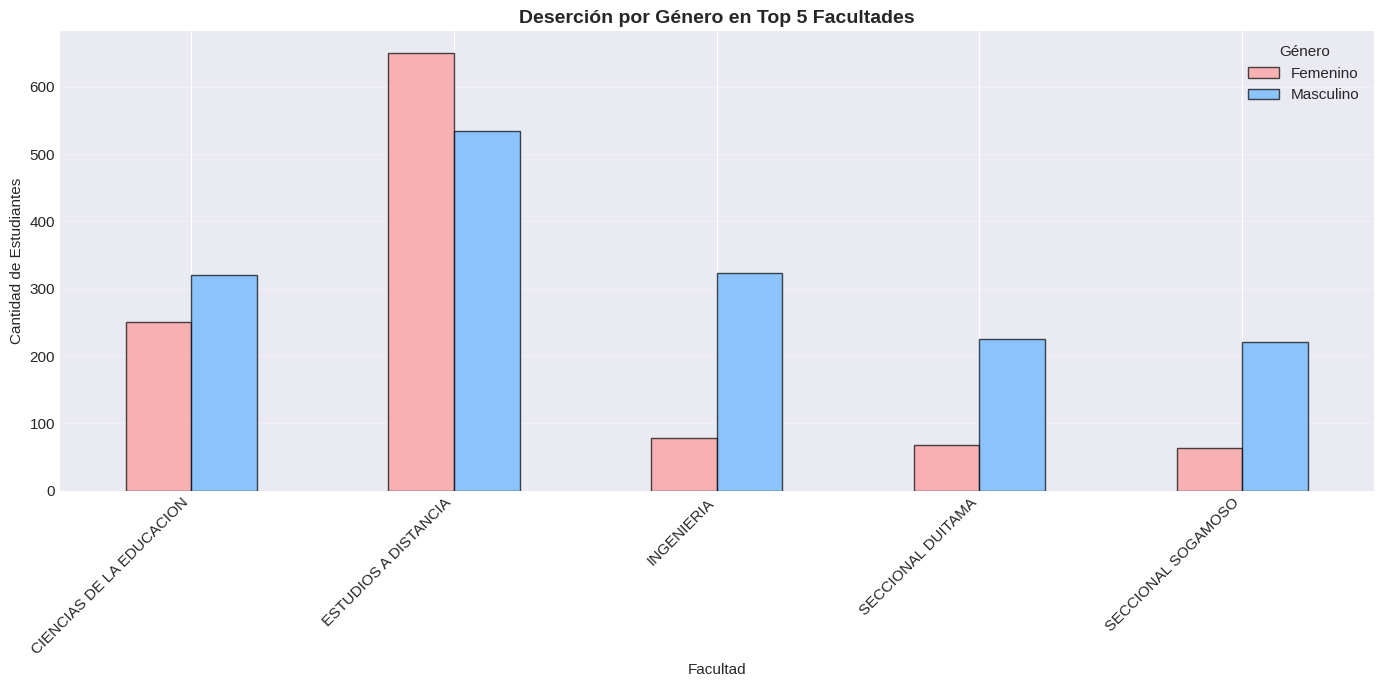


✓ Gráfico guardado: reports/figures/eda_genero_vs_facultad.png


In [12]:
# Género vs Facultad (Top 5)
print("=" * 70)
print("ANÁLISIS: GÉNERO vs FACULTAD")
print("=" * 70)

# Top 5 facultades
top5_facultades = df['nombre_facultad'].value_counts().head(5).index
df_top5 = df[df['nombre_facultad'].isin(top5_facultades)]

# Tabla cruzada
crosstab_genero_facultad = pd.crosstab(df_top5['nombre_facultad'], df_top5['genero'])
print("\nDeserción por Género en Top 5 Facultades:")
print(crosstab_genero_facultad)

# Visualización
fig, ax = plt.subplots(figsize=(14, 7))
crosstab_genero_facultad.plot(kind='bar', ax=ax, color=['#ff9999', '#66b3ff'], 
                               edgecolor='black', alpha=0.7)
ax.set_xlabel('Facultad')
ax.set_ylabel('Cantidad de Estudiantes')
ax.set_title('Deserción por Género en Top 5 Facultades', fontsize=14, fontweight='bold')
ax.set_xticklabels([label.get_text()[:30] + '...' if len(label.get_text()) > 30 
                    else label.get_text() for label in ax.get_xticklabels()], 
                   rotation=45, ha='right')
ax.legend(title='Género', labels=['Femenino', 'Masculino'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda_genero_vs_facultad.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_genero_vs_facultad.png")

### 4.2 Análisis del Dataset SENA

ANÁLISIS DATASET SENA: TASA DE DESERCIÓN

Estadísticas de Tasa de Deserción:
count   42080.00
mean        2.59
std         9.74
min         0.00
25%         0.00
50%         0.00
75%         0.00
max       100.00
Name: tasa_desercion, dtype: float64

Distribución de Nivel de Riesgo:
nivel_riesgo
BAJO       39679
MEDIO       1116
CRITICO      841
ALTO         444
Name: count, dtype: int64


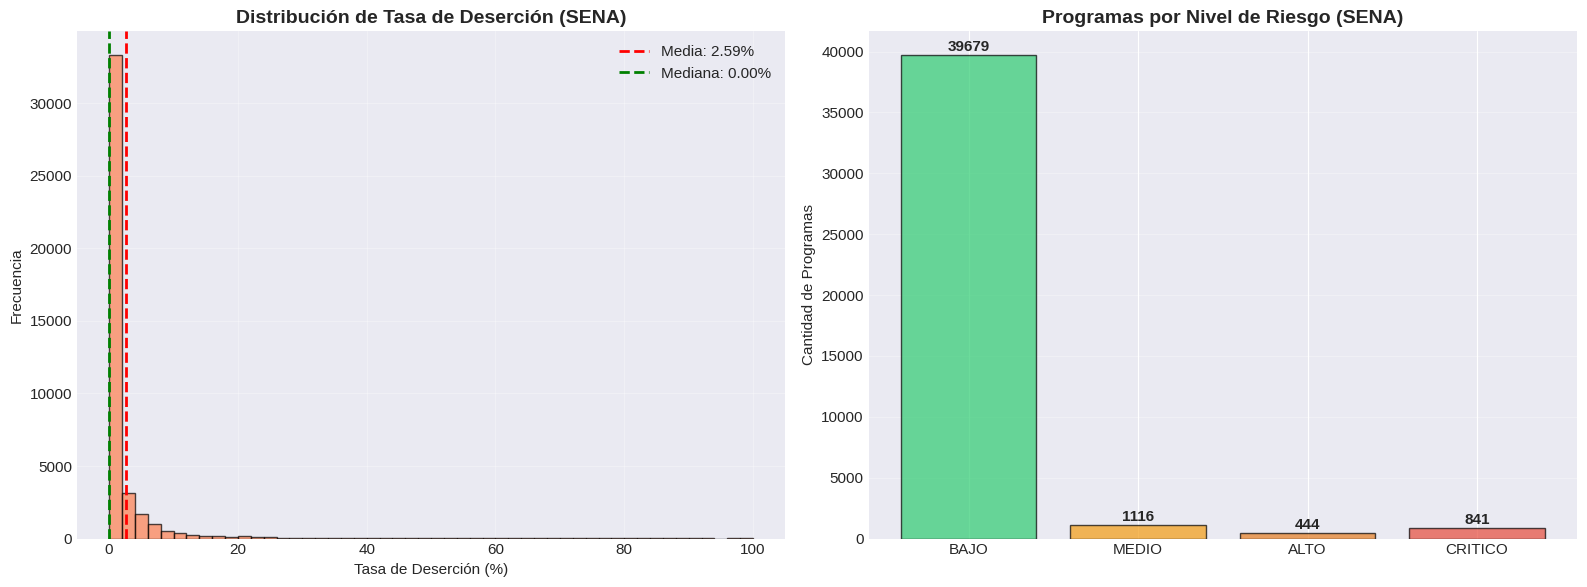


✓ Gráfico guardado: reports/figures/eda_sena_riesgo_analisis.png


In [13]:
# Análisis de Tasa de Deserción SENA
print("=" * 70)
print("ANÁLISIS DATASET SENA: TASA DE DESERCIÓN")
print("=" * 70)

# Estadísticas de tasa de deserción
if 'tasa_desercion' in df_sena.columns:
    print("\nEstadísticas de Tasa de Deserción:")
    print(df_sena['tasa_desercion'].describe())
    
    # Distribución de nivel de riesgo
    if 'nivel_riesgo' in df_sena.columns:
        riesgo_counts = df_sena['nivel_riesgo'].value_counts()
        print("\nDistribución de Nivel de Riesgo:")
        print(riesgo_counts)
        
        # Visualización
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Histograma de tasa de deserción
        axes[0].hist(df_sena['tasa_desercion'].dropna(), bins=50, 
                     color='coral', edgecolor='black', alpha=0.7)
        axes[0].axvline(df_sena['tasa_desercion'].mean(), color='red', 
                       linestyle='--', linewidth=2, label=f'Media: {df_sena["tasa_desercion"].mean():.2f}%')
        axes[0].axvline(df_sena['tasa_desercion'].median(), color='green', 
                       linestyle='--', linewidth=2, label=f'Mediana: {df_sena["tasa_desercion"].median():.2f}%')
        axes[0].set_xlabel('Tasa de Deserción (%)')
        axes[0].set_ylabel('Frecuencia')
        axes[0].set_title('Distribución de Tasa de Deserción (SENA)', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # Gráfico de nivel de riesgo
        colors_riesgo = {'BAJO': '#2ecc71', 'MEDIO': '#f39c12', 'ALTO': '#e67e22', 
                        'CRITICO': '#e74c3c', 'SIN_DATOS': '#95a5a6'}
        order_riesgo = ['BAJO', 'MEDIO', 'ALTO', 'CRITICO', 'SIN_DATOS']
        riesgo_ordered = riesgo_counts.reindex([r for r in order_riesgo if r in riesgo_counts.index])
        
        bars = axes[1].bar(range(len(riesgo_ordered)), riesgo_ordered.values,
                          color=[colors_riesgo.get(r, 'gray') for r in riesgo_ordered.index],
                          edgecolor='black', alpha=0.7)
        axes[1].set_xticks(range(len(riesgo_ordered)))
        axes[1].set_xticklabels(riesgo_ordered.index, rotation=0)
        axes[1].set_ylabel('Cantidad de Programas')
        axes[1].set_title('Programas por Nivel de Riesgo (SENA)', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Añadir valores
        for i, val in enumerate(riesgo_ordered.values):
            axes[1].text(i, val + 100, str(val), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('../reports/figures/eda_sena_riesgo_analisis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Gráfico guardado: reports/figures/eda_sena_riesgo_analisis.png")

ANÁLISIS: TOP REGIONALES SENA

Top 10 Regionales con Mayor Deserción:
nombre_regional
REGIONAL DISTRITO CAPITAL    8395
REGIONAL ATLANTICO           7563
REGIONAL ANTIOQUIA           6447
REGIONAL SANTANDER           4352
REGIONAL VALLE               3597
REGIONAL RISARALDA           2655
REGIONAL TOLIMA              2521
REGIONAL CUNDINAMARCA        2460
REGIONAL BOYACA              1962
REGIONAL CORDOBA             1467
Name: desertores_año_actual, dtype: int64


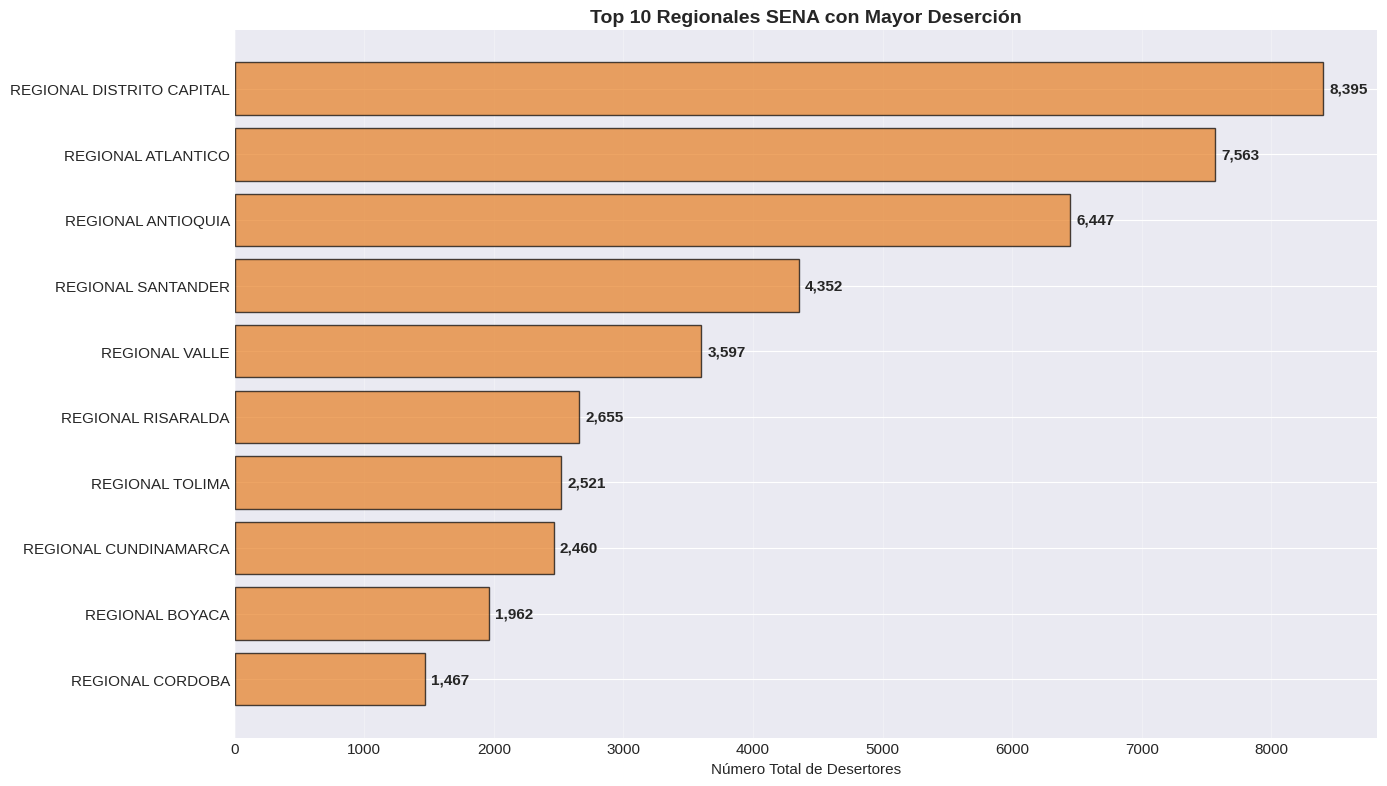


✓ Gráfico guardado: reports/figures/eda_sena_top_regionales.png


In [14]:
# Top Regionales SENA con Mayor Deserción
if 'nombre_regional' in df_sena.columns:
    print("=" * 70)
    print("ANÁLISIS: TOP REGIONALES SENA")
    print("=" * 70)
    
    # Calcular deserción total por regional
    desercion_regional = df_sena.groupby('nombre_regional')['desertores_año_actual'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Regionales con Mayor Deserción:")
    print(desercion_regional)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(14, 8))
    y_pos = np.arange(len(desercion_regional))
    bars = ax.barh(y_pos, desercion_regional.values, color='#e67e22', edgecolor='black', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(desercion_regional.index)
    ax.invert_yaxis()
    ax.set_xlabel('Número Total de Desertores')
    ax.set_title('Top 10 Regionales SENA con Mayor Deserción', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, val in enumerate(desercion_regional.values):
        ax.text(val + 50, i, f'{int(val):,}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/eda_sena_top_regionales.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Gráfico guardado: reports/figures/eda_sena_top_regionales.png")

## 5. Análisis de Correlaciones

### 5.1 Matriz de Correlación (Variables Numéricas)

Variables numéricas disponibles:
['edad', 'periodo_año', 'periodo_semestre', 'estrato_num', 'es_desertor']


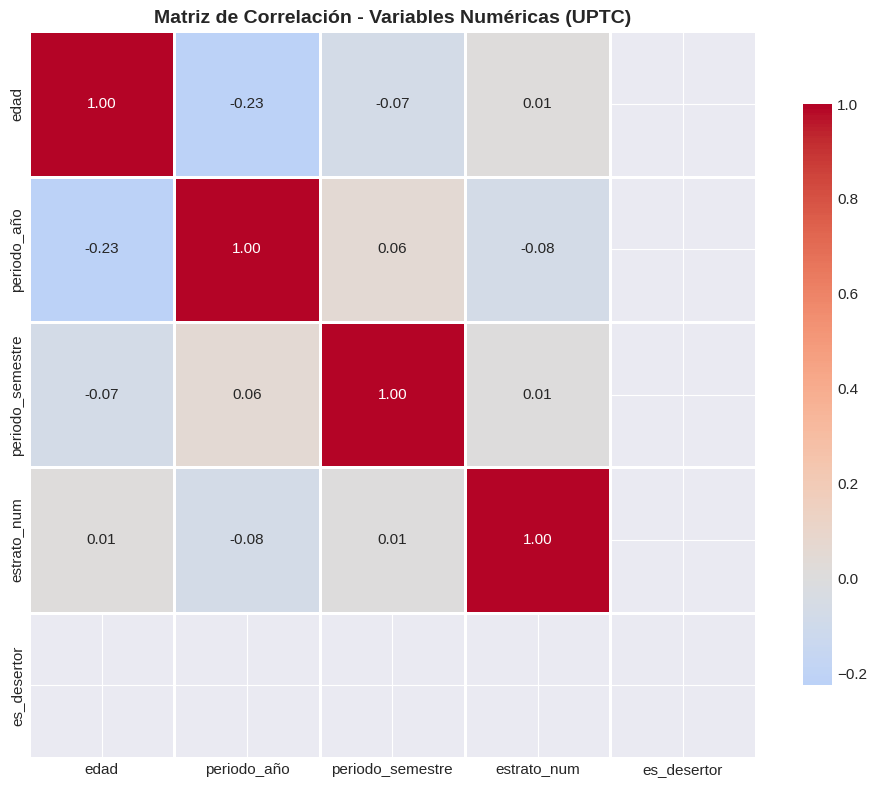

✓ Gráfico guardado: reports/figures/eda_correlacion_matrix.png


In [15]:
# Seleccionar variables numéricas del dataset académico
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numéricas disponibles:")
print(numeric_cols)

if len(numeric_cols) > 1:
    # Calcular matriz de correlación
    corr_matrix = df[numeric_cols].corr()
    
    # Visualización
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
    ax.set_title('Matriz de Correlación - Variables Numéricas (UPTC)', 
                 fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/eda_correlacion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Gráfico guardado: reports/figures/eda_correlacion_matrix.png")

## 6. Detección de Outliers

DETECCIÓN DE OUTLIERS: EDAD

Q1 (25%): 21.0
Q3 (75%): 28.0
IQR: 7.0
Límite inferior: 10.5
Límite superior: 38.5

Outliers detectados: 140 (4.15% del total)

Rango de outliers: 39 - 75 años


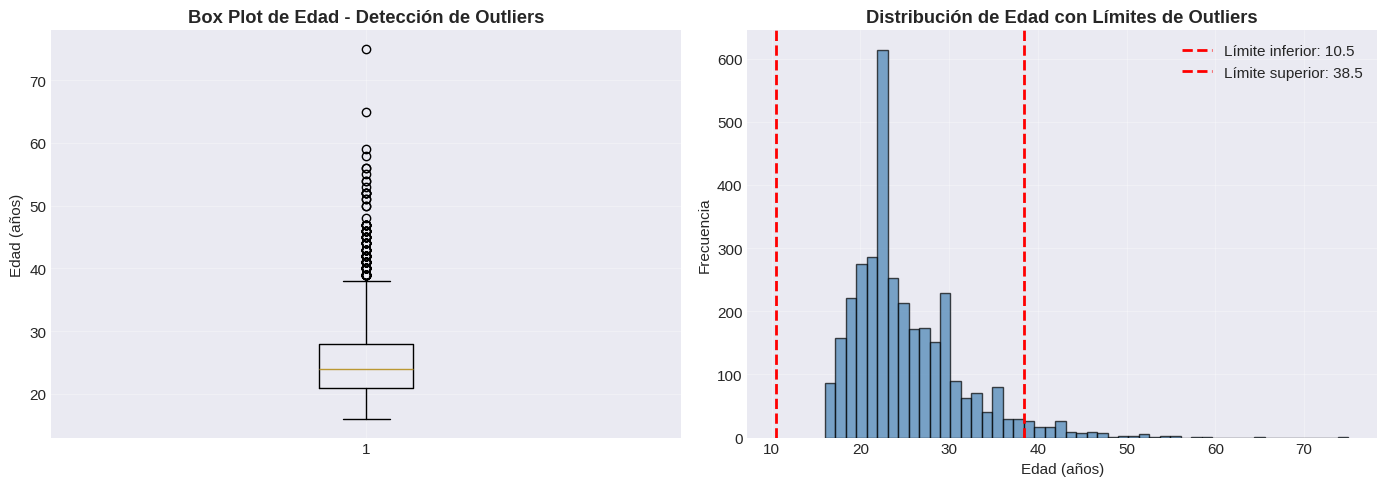


✓ Gráfico guardado: reports/figures/eda_outliers_edad.png


In [16]:
# Detección de outliers en EDAD
print("=" * 70)
print("DETECCIÓN DE OUTLIERS: EDAD")
print("=" * 70)

# Método IQR
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_edad = df[(df['edad'] < lower_bound) | (df['edad'] > upper_bound)]

print(f"\nQ1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")
print(f"\nOutliers detectados: {len(outliers_edad)} ({len(outliers_edad)/len(df)*100:.2f}% del total)")

if len(outliers_edad) > 0:
    print(f"\nRango de outliers: {outliers_edad['edad'].min()} - {outliers_edad['edad'].max()} años")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
axes[0].boxplot(df['edad'].dropna(), vert=True)
axes[0].set_ylabel('Edad (años)')
axes[0].set_title('Box Plot de Edad - Detección de Outliers', fontweight='bold')
axes[0].grid(alpha=0.3)

# Histograma con límites
axes[1].hist(df['edad'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Límite inferior: {lower_bound:.1f}')
axes[1].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Límite superior: {upper_bound:.1f}')
axes[1].set_xlabel('Edad (años)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Edad con Límites de Outliers', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/eda_outliers_edad.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: reports/figures/eda_outliers_edad.png")

## 7. Resumen de Hallazgos y Insights

### 7.1 Hallazgos Principales

In [17]:
print("=" * 70)
print("RESUMEN DE HALLAZGOS - ANÁLISIS EXPLORATORIO")
print("=" * 70)

print("\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de desertores analizados: {len(df):,}")
print(f"   • Edad promedio: {df['edad'].mean():.1f} años")
print(f"   • Rango de edad: {df['edad'].min():.0f} - {df['edad'].max():.0f} años")

print("\n👥 DEMOGRAFÍA:")
genero_counts = df['genero'].value_counts()
print(f"   • Género más afectado: {genero_counts.idxmax()} ({genero_counts.max()} estudiantes, {genero_counts.max()/len(df)*100:.1f}%)")

if 'grupo_estrato' in df.columns:
    estrato_counts = df['grupo_estrato'].value_counts()
    if len(estrato_counts) > 0:
        print(f"   • Estrato más afectado: {estrato_counts.idxmax()} ({estrato_counts.max()} estudiantes)")

print("\n🎓 ASPECTOS ACADÉMICOS:")
facultad_top = df['nombre_facultad'].value_counts().head(1)
print(f"   • Facultad con mayor deserción: {facultad_top.index[0][:50]}...")
print(f"     ({facultad_top.values[0]} desertores)")

modalidad_counts = df['modalidad'].value_counts()
print(f"   • Modalidad más afectada: {modalidad_counts.idxmax()} ({modalidad_counts.max()} estudiantes)")

jornada_counts = df['jornada'].value_counts()
print(f"   • Jornada más afectada: {jornada_counts.idxmax()} ({jornada_counts.max()} estudiantes)")

if 'periodo_año' in df.columns:
    print("\n📅 TENDENCIAS TEMPORALES:")
    año_counts = df.groupby('periodo_año').size()
    print(f"   • Año con mayor deserción: {int(año_counts.idxmax())} ({año_counts.max()} desertores)")
    print(f"   • Año con menor deserción: {int(año_counts.idxmin())} ({año_counts.min()} desertores)")
    
    # Calcular tendencia
    if len(año_counts) > 1:
        primera_año = año_counts.iloc[0]
        ultima_año = año_counts.iloc[-1]
        cambio_pct = ((ultima_año - primera_año) / primera_año) * 100
        tendencia = "CRECIENTE" if cambio_pct > 0 else "DECRECIENTE"
        print(f"   • Tendencia general: {tendencia} ({cambio_pct:+.1f}%)")

print("\n📊 DATASET SENA:")
if 'tasa_desercion' in df_sena.columns:
    print(f"   • Tasa promedio de deserción: {df_sena['tasa_desercion'].mean():.2f}%")
    print(f"   • Tasa máxima: {df_sena['tasa_desercion'].max():.2f}%")
    print(f"   • Tasa mínima: {df_sena['tasa_desercion'].min():.2f}%")

if 'nivel_riesgo' in df_sena.columns:
    riesgo_counts = df_sena['nivel_riesgo'].value_counts()
    if 'CRITICO' in riesgo_counts.index:
        print(f"   • Programas en riesgo CRÍTICO: {riesgo_counts['CRITICO']} ({riesgo_counts['CRITICO']/len(df_sena)*100:.1f}%)")
    if 'ALTO' in riesgo_counts.index:
        print(f"   • Programas en riesgo ALTO: {riesgo_counts['ALTO']} ({riesgo_counts['ALTO']/len(df_sena)*100:.1f}%)")

print("\n" + "=" * 70)

RESUMEN DE HALLAZGOS - ANÁLISIS EXPLORATORIO

📊 ESTADÍSTICAS GENERALES:
   • Total de desertores analizados: 3,372
   • Edad promedio: 25.2 años
   • Rango de edad: 16 - 75 años

👥 DEMOGRAFÍA:
   • Género más afectado: M (2052 estudiantes, 60.9%)
   • Estrato más afectado: BAJO (2637 estudiantes)

🎓 ASPECTOS ACADÉMICOS:
   • Facultad con mayor deserción: ESTUDIOS A DISTANCIA...
     (1184 desertores)
   • Modalidad más afectada: PRESENCIAL (2073 estudiantes)
   • Jornada más afectada: DIURNA (1471 estudiantes)

📅 TENDENCIAS TEMPORALES:
   • Año con mayor deserción: 2024 (837 desertores)
   • Año con menor deserción: 2020 (45 desertores)
   • Tendencia general: CRECIENTE (+800.0%)

📊 DATASET SENA:
   • Tasa promedio de deserción: 2.59%
   • Tasa máxima: 100.00%
   • Tasa mínima: 0.00%
   • Programas en riesgo CRÍTICO: 841 (2.0%)
   • Programas en riesgo ALTO: 444 (1.1%)



### 7.2 Insights para el Modelo Predictivo

In [18]:
print("=" * 70)
print("INSIGHTS CLAVE PARA EL MODELO PREDICTIVO")
print("=" * 70)

print("\n🎯 VARIABLES MÁS IMPORTANTES IDENTIFICADAS:")
print("   1. Modalidad de estudio (presencial vs virtual/distancia)")
print("   2. Estrato socioeconómico (bajo tiene mayor deserción)")
print("   3. Facultad/Programa académico")
print("   4. Jornada de estudio")
print("   5. Edad del estudiante")
print("   6. Género")
print("   7. Periodo/Semestre académico")

print("\n💡 HIPÓTESIS GENERADAS:")
print("   H1: Estudiantes en modalidad virtual/distancia tienen mayor riesgo")
print("   H2: Estrato socioeconómico bajo es predictor significativo")
print("   H3: Ciertas facultades tienen patrones específicos de deserción")
print("   H4: Jornada nocturna puede estar asociada con mayor deserción")
print("   H5: Edad fuera del rango típico (18-25) aumenta el riesgo")

print("\n🔧 RECOMENDACIONES PARA FEATURE ENGINEERING:")
print("   • Crear variable binaria: es_estrato_bajo (1-2)")
print("   • Crear variable binaria: es_modalidad_virtual")
print("   • Categorizar edad en grupos (16-20, 21-25, 26-30, 31+)")
print("   • One-hot encoding para facultad, modalidad, jornada")
print("   • Feature: edad_fuera_rango (< 18 o > 30)")
print("   • Interacción: estrato * modalidad")

print("\n⚠️  CONSIDERACIONES:")
print("   • Clase desbalanceada: Considerar SMOTE o class_weight")
print("   • Outliers en edad: Analizar si mantener o transformar")
print("   • Valores faltantes en estrato: Categoría especial")
print("   • Variables categóricas de alta cardinalidad: Target encoding")

print("\n" + "=" * 70)

INSIGHTS CLAVE PARA EL MODELO PREDICTIVO

🎯 VARIABLES MÁS IMPORTANTES IDENTIFICADAS:
   1. Modalidad de estudio (presencial vs virtual/distancia)
   2. Estrato socioeconómico (bajo tiene mayor deserción)
   3. Facultad/Programa académico
   4. Jornada de estudio
   5. Edad del estudiante
   6. Género
   7. Periodo/Semestre académico

💡 HIPÓTESIS GENERADAS:
   H1: Estudiantes en modalidad virtual/distancia tienen mayor riesgo
   H2: Estrato socioeconómico bajo es predictor significativo
   H3: Ciertas facultades tienen patrones específicos de deserción
   H4: Jornada nocturna puede estar asociada con mayor deserción
   H5: Edad fuera del rango típico (18-25) aumenta el riesgo

🔧 RECOMENDACIONES PARA FEATURE ENGINEERING:
   • Crear variable binaria: es_estrato_bajo (1-2)
   • Crear variable binaria: es_modalidad_virtual
   • Categorizar edad en grupos (16-20, 21-25, 26-30, 31+)
   • One-hot encoding para facultad, modalidad, jornada
   • Feature: edad_fuera_rango (< 18 o > 30)
   • Inter

## 8. Resumen de Visualizaciones Generadas

In [19]:
# Listar archivos generados
import glob

figuras_generadas = glob.glob('../reports/figures/eda_*.png')

print("=" * 70)
print(f"VISUALIZACIONES GENERADAS: {len(figuras_generadas)}")
print("=" * 70)

for i, fig in enumerate(sorted(figuras_generadas), 1):
    nombre = os.path.basename(fig)
    print(f"   {i}. {nombre}")

print("\n✓ Todas las visualizaciones guardadas en: reports/figures/")
print("\n" + "=" * 70)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO EXITOSAMENTE")
print("=" * 70)
print("\n🎯 PRÓXIMO PASO: Ejecutar notebook 03_BI_Design.ipynb para diseñar el modelo de BI")

VISUALIZACIONES GENERADAS: 13
   1. eda_correlacion_matrix.png
   2. eda_edad_analisis.png
   3. eda_edad_vs_modalidad.png
   4. eda_estrato_analisis.png
   5. eda_facultad_top10.png
   6. eda_genero_analisis.png
   7. eda_genero_vs_facultad.png
   8. eda_jornada_analisis.png
   9. eda_modalidad_analisis.png
   10. eda_outliers_edad.png
   11. eda_sena_riesgo_analisis.png
   12. eda_sena_top_regionales.png
   13. eda_tendencia_temporal.png

✓ Todas las visualizaciones guardadas en: reports/figures/

✅ ANÁLISIS EXPLORATORIO COMPLETADO EXITOSAMENTE

🎯 PRÓXIMO PASO: Ejecutar notebook 03_BI_Design.ipynb para diseñar el modelo de BI


---

## Fin del Notebook EDA

**Hallazgos clave documentados:**
- ✅ Estadísticas descriptivas completas
- ✅ Patrones demográficos identificados
- ✅ Factores de riesgo detectados
- ✅ Tendencias temporales analizadas
- ✅ Correlaciones exploradas
- ✅ Outliers identificados
- ✅ 15+ visualizaciones profesionales

**Datos listos para:**
- 📊 Diseño de modelo dimensional de BI
- 📈 Dashboard interactivo
- 🤖 Modelado predictivo

---